### Load Data File

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from decimal import *
import numpy as np # linear algebra
import pandas as pd # read_csv and such
from io import StringIO # convert strings to buffers or something like that.
import os # for listing files in directory
import seaborn as sns
import scipy.stats as stats

pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

In [8]:
flights_weather_path = '../data/flight_delays_2015/flights_weather.csv'
dtypes = {
    'ORIGIN_AIRPORT': 'str', 
    'DESTINATION_AIRPORT': 'str', 
    'IATA_CODE_x': 'str', 
    'origin_weather_station': 'str', 
    'IATA_CODE_y': 'str', 
    'destination_weather_station': 'str', 
    'OR_MAX': 'str', 
    'OR_MIN': 'str', 
    'OR_PRCP': 'str', 
    'DES_MAX': 'str', 
    'DES_MIN': 'str', 
    'DES_PRCP': 'str', 
    'OR_FRSHTT': 'str', 
    'DES_FRSHTT': 'str'
}
fw_df = pd.read_csv(flights_weather_path, dtype=dtypes, parse_dates=['DATE'])
fw_df = fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_MXSPD', 'OR_SNDP',
               'OR_PRCP', 'OR_GUST', 'OR_MAX', 'OR_MIN', 'OR_FOG', 'OR_RAIN_DRIZZLE', 'OR_SNOW_ICE_PELLETS',
               'OR_HAIL', 'OR_THUNDER', 'OR_TORNADO_FUNNEL_CLOUD', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP',
               'DES_MXSPD', 'DES_SNDP', 'DES_PRCP', 'DES_GUST', 'DES_MAX', 'DES_MIN', 'DES_FOG', 'DES_RAIN_DRIZZLE',
               'DES_SNOW_ICE_PELLETS', 'DES_HAIL', 'DES_THUNDER', 'DES_TORNADO_FUNNEL_CLOUD']]
#fw_df = fw_df.dropna()
fw_df.head()

,MONTH,WEATHER_DELAY,OR_TEMP,OR_VISIB,OR_WDSP,OR_MXSPD,OR_SNDP,OR_PRCP,OR_GUST,OR_MAX,OR_MIN,OR_FOG,OR_RAIN_DRIZZLE,OR_SNOW_ICE_PELLETS,OR_HAIL,OR_THUNDER,OR_TORNADO_FUNNEL_CLOUD,DES_TEMP,DES_VISIB,DES_WDSP,DES_MXSPD,DES_SNDP,DES_PRCP,DES_GUST,DES_MAX,DES_MIN,DES_FOG,DES_RAIN_DRIZZLE,DES_SNOW_ICE_PELLETS,DES_HAIL,DES_THUNDER,DES_TORNADO_FUNNEL_CLOUD
0,1,NaN,35.1,7.5,3.6,6.0,999.9,0.09G,999.9,43.0,32.0,True,True,False,False,False,False,32.9,10.0,4.6,11.1,999.9,0.00G,999.9,42.1,26.1,False,False,False,False,False,False
1,1,NaN,35.1,7.5,3.6,6.0,999.9,0.09G,999.9,43.0,32.0,True,True,False,False,False,False,32.9,10.0,4.6,11.1,999.9,0.00G,999.9,42.1,26.1,False,False,False,False,False,False
2,1,NaN,35.1,7.5,3.6,6.0,999.9,0.09G,999.9,43.0,32.0,True,True,False,False,False,False,32.9,10.0,4.6,11.1,999.9,0.00G,999.9,42.1,26.1,False,False,False,False,False,False
3,1,NaN,35.1,7.5,3.6,6.0,999.9,0.09G,999.9,43.0,32.0,True,True,False,False,False,False,32.9,10.0,4.6,11.1,999.9,0.00G,999.9,42.1,26.1,False,False,False,False,False,False
4,1,NaN,35.1,7.5,3.6,6.0,999.9,0.09G,999.9,43.0,32.0,True,True,False,False,False,False,32.9,10.0,4.6,11.1,999.9,0.00G,999.9,42.1,26.1,False,False,False,False,False,False


In [9]:
fw_df['OR_PRCP'] = pd.to_numeric(fw_df['OR_PRCP'].str.replace('A|B|C|D|E|F|G|H|I', ''))
fw_df['OR_MAX'] = pd.to_numeric(fw_df['OR_MAX'].str.replace('*', ''))
fw_df['OR_MIN'] = pd.to_numeric(fw_df['OR_MIN'].str.replace('*', ''))
fw_df.loc[fw_df['OR_TEMP'] == 9999.9, 'OR_TEMP'] = fw_df.OR_TEMP.mean()
fw_df.loc[fw_df['OR_WDSP'] == 999.9, 'OR_WDSP'] = fw_df.OR_WDSP.mean()
fw_df.loc[fw_df['OR_PRCP'] == 99.99, 'OR_PRCP'] = 0
fw_df.loc[fw_df['OR_VISIB'] == 999.9, 'OR_VISIB'] = fw_df.OR_VISIB.mean()
fw_df.loc[fw_df['OR_GUST'] == 999.9, 'OR_GUST'] = fw_df.OR_GUST.mean()
fw_df.loc[fw_df['OR_MAX'] == 9999.9, 'OR_MAX'] = fw_df.OR_MAX.mean()
fw_df.loc[fw_df['OR_MIN'] == 9999.9, 'OR_MIN'] = fw_df.OR_MIN.mean()
fw_df.loc[fw_df['OR_WDSP'] == 999.9, 'OR_WDSP'] = fw_df.OR_WDSP.mean()
fw_df.loc[fw_df['OR_MXSPD'] == 999.9, 'OR_MXSPD'] = fw_df.OR_MXSPD.mean()
fw_df.loc[fw_df['OR_SNDP'] == 999.9, 'OR_SNDP'] = 0
fw_df.loc[fw_df['OR_FOG'] == True, 'OR_FOGV'] = 1
fw_df.loc[fw_df['OR_FOG'] == False, 'OR_FOGV'] = 0
fw_df.loc[fw_df['OR_RAIN_DRIZZLE'] == True, 'OR_RAIN_DRIZZLEV'] = 1
fw_df.loc[fw_df['OR_RAIN_DRIZZLE'] == False, 'OR_RAIN_DRIZZLEV'] = 0
fw_df.loc[fw_df['OR_SNOW_ICE_PELLETS'] == True, 'OR_SNOW_ICE_PELLETSV'] = 1
fw_df.loc[fw_df['OR_SNOW_ICE_PELLETS'] == False, 'OR_SNOW_ICE_PELLETSV'] = 0
fw_df.loc[fw_df['OR_HAIL'] == True, 'OR_HAILV'] = 1
fw_df.loc[fw_df['OR_HAIL'] == False, 'OR_HAILV'] = 0
fw_df.loc[fw_df['OR_THUNDER'] == True, 'OR_THUNDERV'] = 1
fw_df.loc[fw_df['OR_THUNDER'] == False, 'OR_THUNDERV'] = 0
fw_df.loc[fw_df['OR_TORNADO_FUNNEL_CLOUD'] == True, 'OR_TORNADO_FUNNEL_CLOUDV'] = 1
fw_df.loc[fw_df['OR_TORNADO_FUNNEL_CLOUD'] == False, 'OR_TORNADO_FUNNEL_CLOUDV'] = 0
fw_df['DES_PRCP'] = pd.to_numeric(fw_df['DES_PRCP'].str.replace('A|B|C|D|E|F|G|H|I', ''))
fw_df['DES_MAX'] = pd.to_numeric(fw_df['DES_MAX'].str.replace('*', ''))
fw_df['DES_MIN'] = pd.to_numeric(fw_df['DES_MIN'].str.replace('*', ''))
fw_df.loc[fw_df['DES_TEMP'] == 9999.9, 'DES_TEMP'] = fw_df.DES_TEMP.mean()
fw_df.loc[fw_df['DES_WDSP'] == 999.9, 'DES_WDSP'] = fw_df.DES_WDSP.mean()
fw_df.loc[fw_df['DES_PRCP'] == 99.99, 'DES_PRCP'] = 0
fw_df.loc[fw_df['DES_VISIB'] == 999.9, 'DES_VISIB'] = fw_df.DES_VISIB.mean()
fw_df.loc[fw_df['DES_GUST'] == 999.9, 'DES_GUST'] = fw_df.DES_GUST.mean()
fw_df.loc[fw_df['DES_MAX'] == 9999.9, 'DES_MAX'] = fw_df.DES_MAX.mean()
fw_df.loc[fw_df['DES_MIN'] == 9999.9, 'DES_MIN'] = fw_df.DES_MIN.mean()
fw_df.loc[fw_df['DES_WDSP'] == 999.9, 'DES_WDSP'] = fw_df.DES_WDSP.mean()
fw_df.loc[fw_df['DES_MXSPD'] == 999.9, 'DES_MXSPD'] = fw_df.DES_MXSPD.mean()
fw_df.loc[fw_df['DES_SNDP'] == 999.9, 'DES_SNDP'] = 0
fw_df.loc[fw_df['DES_FOG'] == True, 'DES_FOGV'] = 1
fw_df.loc[fw_df['DES_FOG'] == False, 'DES_FOGV'] = 0
fw_df.loc[fw_df['DES_RAIN_DRIZZLE'] == True, 'DES_RAIN_DRIZZLEV'] = 1
fw_df.loc[fw_df['DES_RAIN_DRIZZLE'] == False, 'DES_RAIN_DRIZZLEV'] = 0
fw_df.loc[fw_df['DES_SNOW_ICE_PELLETS'] == True, 'DES_SNOW_ICE_PELLETSV'] = 1
fw_df.loc[fw_df['DES_SNOW_ICE_PELLETS'] == False, 'DES_SNOW_ICE_PELLETSV'] = 0
fw_df.loc[fw_df['DES_HAIL'] == True, 'DES_HAILV'] = 1
fw_df.loc[fw_df['DES_HAIL'] == False, 'DES_HAILV'] = 0
fw_df.loc[fw_df['DES_THUNDER'] == True, 'DES_THUNDERV'] = 1
fw_df.loc[fw_df['DES_THUNDER'] == False, 'DES_THUNDERV'] = 0
fw_df.loc[fw_df['DES_TORNADO_FUNNEL_CLOUD'] == True, 'DES_TORNADO_FUNNEL_CLOUDV'] = 1
fw_df.loc[fw_df['DES_TORNADO_FUNNEL_CLOUD'] == False, 'DES_TORNADO_FUNNEL_CLOUDV'] = 0
fw_df.loc[fw_df['WEATHER_DELAY'].isnull(), 'WEATHER_DELAY'] = 0


In [10]:
fw_df = fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_MXSPD', 'OR_SNDP',
               'OR_PRCP', 'OR_MAX', 'OR_MIN', 'OR_FOGV', 'OR_RAIN_DRIZZLEV', 'OR_SNOW_ICE_PELLETSV',
               'OR_HAILV', 'OR_THUNDERV', 'OR_TORNADO_FUNNEL_CLOUDV', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP',
               'DES_MXSPD', 'DES_SNDP', 'DES_PRCP','DES_MAX', 'DES_MIN', 'DES_FOGV', 'DES_RAIN_DRIZZLEV',
               'DES_SNOW_ICE_PELLETSV', 'DES_HAILV', 'DES_THUNDERV', 'DES_TORNADO_FUNNEL_CLOUDV']]

#### Mean of data by months

In [14]:
fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_PRCP', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_PRCP']].groupby(['MONTH']).mean()

,WEATHER_DELAY,OR_TEMP,OR_VISIB,OR_WDSP,OR_PRCP,DES_TEMP,DES_VISIB,DES_WDSP,DES_PRCP
MONTH,,,,,,,,,
1,0.559798,41.648430,8.784290,6.827335,0.078217,41.642870,8.784139,6.827544,0.078268
2,0.958233,40.416848,8.936263,7.655034,0.075158,40.417770,8.935477,7.655996,0.075211
3,0.453412,52.269415,9.027503,7.117168,0.082179,52.268915,9.027486,7.117405,0.082196
4,0.456744,60.476726,9.379177,7.983977,0.115798,60.476880,9.379122,7.984262,0.115831
5,0.677183,67.204393,9.486458,7.462618,0.134795,67.206826,9.486375,7.462100,0.134855
6,0.755510,74.239246,9.482443,6.754501,0.155612,74.238363,9.482365,6.754071,0.155650
7,0.446437,77.692129,9.640169,6.729446,0.095864,77.693193,9.640062,6.729606,0.095855
8,0.520614,77.000393,9.713276,6.377220,0.097992,77.001557,9.713312,6.377195,0.097965
9,0.294750,73.624424,9.602228,6.172807,0.102014,73.625440,9.602124,6.172396,0.102014


#### Median of data by months

In [15]:
fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_PRCP', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_PRCP']].groupby(['MONTH']).median()

,WEATHER_DELAY,OR_TEMP,OR_VISIB,OR_WDSP,OR_PRCP,DES_TEMP,DES_VISIB,DES_WDSP,DES_PRCP
MONTH,,,,,,,,,
1,0.0,41.4,9.9,6.2,0.0,41.4,9.9,6.2,0.0
2,0.0,41.4,9.8,7.2,0.0,41.4,9.8,7.2,0.0
3,0.0,53.7,10.0,6.6,0.0,53.7,10.0,6.6,0.0
4,0.0,60.3,10.0,7.4,0.0,60.3,10.0,7.4,0.0
5,0.0,68.7,10.0,7.1,0.0,68.7,10.0,7.1,0.0
6,0.0,75.2,10.0,6.5,0.0,75.2,10.0,6.5,0.0
7,0.0,78.3,10.0,6.4,0.0,78.3,10.0,6.4,0.0
8,0.0,77.1,10.0,6.2,0.0,77.1,10.0,6.2,0.0
9,0.0,74.2,10.0,5.9,0.0,74.2,10.0,5.9,0.0


#### First and Third quartiles of data by months

In [16]:
fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_PRCP', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_PRCP']].groupby(['MONTH']).quantile(.25)

0.25,DES_PRCP,DES_TEMP,DES_VISIB,DES_WDSP,OR_PRCP,OR_TEMP,OR_VISIB,OR_WDSP,WEATHER_DELAY
MONTH,,,,,,,,,
1,0.0,30.5,8.2,4.1,0.0,30.5,8.2,4.1,0.0
2,0.0,24.6,8.5,5.0,0.0,24.6,8.5,5.0,0.0
3,0.0,41.0,8.9,5.0,0.0,41.0,8.9,5.0,0.0
4,0.0,52.5,9.4,5.6,0.0,52.5,9.4,5.6,0.0
5,0.0,60.0,9.5,5.4,0.0,60.0,9.5,5.4,0.0
6,0.0,67.5,9.5,4.9,0.0,67.5,9.5,4.9,0.0
7,0.0,72.4,9.7,4.8,0.0,72.4,9.7,4.8,0.0
8,0.0,71.9,9.7,4.6,0.0,71.9,9.7,4.6,0.0
9,0.0,67.7,9.7,4.2,0.0,67.7,9.7,4.2,0.0


In [17]:
fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_PRCP', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_PRCP']].groupby(['MONTH']).quantile(.75)

0.75,DES_PRCP,DES_TEMP,DES_VISIB,DES_WDSP,OR_PRCP,OR_TEMP,OR_VISIB,OR_WDSP,WEATHER_DELAY
MONTH,,,,,,,,,
1,0.02,54.0,10.0,9.1,0.02,54.0,10.0,9.1,0.0
2,0.02,57.7,10.0,10.0,0.02,57.7,10.0,10.0,0.0
3,0.04,64.3,10.0,9.0,0.04,64.3,10.0,9.0,0.0
4,0.07,69.2,10.0,9.9,0.07,69.2,10.0,9.9,0.0
5,0.04,74.7,10.0,9.2,0.04,74.7,10.0,9.2,0.0
6,0.07,81.4,10.0,8.2,0.07,81.4,10.0,8.2,0.0
7,0.02,83.4,10.0,8.3,0.02,83.4,10.0,8.3,0.0
8,0.00,82.4,10.0,7.8,0.00,82.4,10.0,7.8,0.0
9,0.01,80.0,10.0,7.7,0.01,80.0,10.0,7.7,0.0


From the mean most of the data looks about like what you would expect. The most interesting aspect is that based on the data from 2015 it almost looks as if the precipitation follows a six month cycle. Climbing from January through June and then dropping drastically in July (dropping by almost 50%). This pattern then repeats again from July through December and then if you assume the data repeats (such that January 2016 would have similar precipitation as January 2015) then it is followed by a similar drop.

From looking at the Quartiles and Median, you can see that nearly all of the precipitation is captured by 25% of the flights and all of the weather delays are. To see more information about weather delay, let's look at the 95% quantile.

In [18]:
fw_df[['MONTH', 'WEATHER_DELAY', 'OR_TEMP', 'OR_VISIB', 'OR_WDSP', 'OR_PRCP', 'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_PRCP']].groupby(['MONTH']).quantile(.9)

0.9,DES_PRCP,DES_TEMP,DES_VISIB,DES_WDSP,OR_PRCP,OR_TEMP,OR_VISIB,OR_WDSP,WEATHER_DELAY
MONTH,,,,,,,,,
1,0.20,62.0,10.0,12.3,0.20,62.0,10.0,12.3,0.0
2,0.23,64.5,10.0,13.0,0.23,64.5,10.0,13.0,0.0
3,0.26,73.0,10.0,11.3,0.26,73.0,10.0,11.3,0.0
4,0.39,75.8,10.0,12.5,0.39,75.8,10.0,12.5,0.0
5,0.40,78.7,10.0,11.6,0.40,78.7,10.0,11.6,0.0
6,0.52,84.6,10.0,10.1,0.52,84.6,10.0,10.1,0.0
7,0.26,86.9,10.0,10.2,0.26,86.9,10.0,10.2,0.0
8,0.27,86.9,10.0,9.7,0.27,86.9,10.0,9.7,0.0
9,0.30,83.7,10.0,9.7,0.30,83.7,10.0,9.7,0.0


Here we can see that in all months, weather delayed flights account for less than 10% of the total flights.

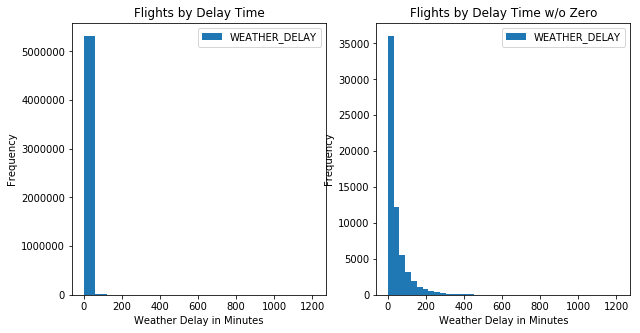

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax=fw_df[['WEATHER_DELAY']].plot(kind='hist', bins = 20, ax=axes[0], title='Flights by Delay Time', figsize=(12,5))
ax.set_xlabel('Weather Delay in Minutes')
ax=fw_df.loc[fw_df['WEATHER_DELAY'] != 0][['WEATHER_DELAY']].plot(kind='hist', bins = 40, ax=axes[1], title='Flights by Delay Time w/o Zero', figsize=(10,5))
ax.set_xlabel('Weather Delay in Minutes')

Since our data is so skewed by flights with no weather delay, those flights obscure the rest of the flights in the first histogram. The second histogram only shows flights with delays and looks a lot better. You can see that even among only flights with a weather delay, the majority of  flights are have the smallest delay. But there are a small amount of flights with very large delays.

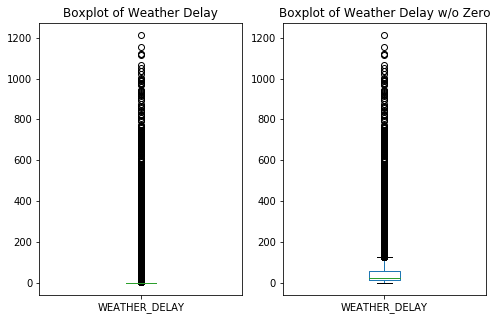

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fw_df[['WEATHER_DELAY']].plot(kind='box', ax=axes[0], title='Boxplot of Weather Delay', figsize=(8,5))
fw_df.loc[fw_df['WEATHER_DELAY'] != 0][['WEATHER_DELAY']].plot(kind='box', ax=axes[1], title='Boxplot of Weather Delay w/o Zero', figsize=(8,5))

Looking at boxplots of the weather delays we can verify the same thing, if looking at the entire set of data, any flight with a weather delay is an outlier. If we look at only delayed flights, the plot shows that any flight delayed more than about 130 minutes is also an outlier.

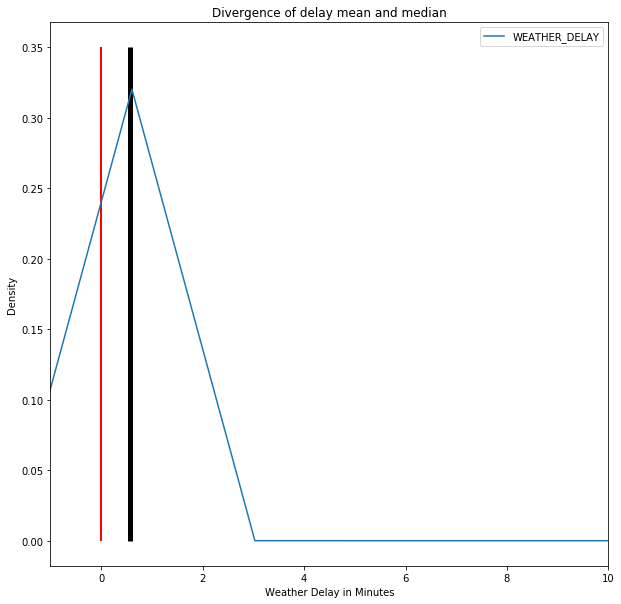

In [22]:
ax=fw_df[['WEATHER_DELAY']].plot(kind="density",
              figsize=(10,10),
              xlim=(-1,10), title='Divergence of delay mean and median')
ax.set_xlabel('Weather Delay in Minutes')


plt.vlines(fw_df[['WEATHER_DELAY']].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.35,
           linewidth=5.0)

plt.vlines(fw_df[['WEATHER_DELAY']].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.35,
           linewidth=2.0,
           color="red")

Here are the same plots for precipitation and temperature.

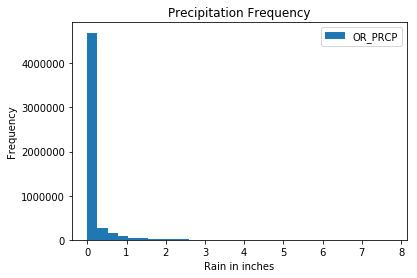

In [23]:
ax=fw_df[['OR_PRCP']].plot(kind='hist', bins = 30, title='Precipitation Frequency')
ax.set_xlabel('Rain in inches')

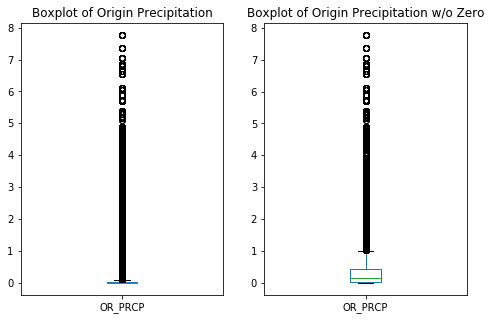

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fw_df[['OR_PRCP']].plot(kind='box', ax=axes[0], title='Boxplot of Origin Precipitation', figsize=(8,5))
fw_df[fw_df['OR_PRCP'] != 0][['OR_PRCP']].plot(kind='box', ax=axes[1], title='Boxplot of Origin Precipitation w/o Zero', figsize=(8,5))

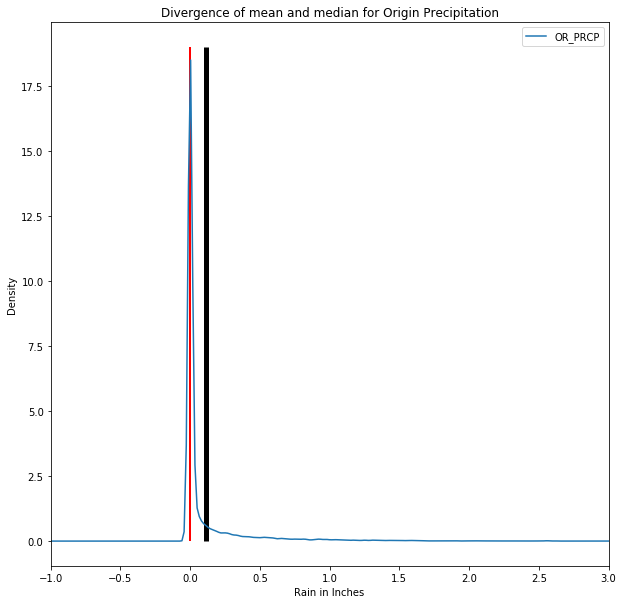

In [26]:
ax=fw_df[['OR_PRCP']].plot(kind="density",
              figsize=(10,10),
              xlim=(-1,3), title='Divergence of mean and median for Origin Precipitation')
ax.set_xlabel('Rain in Inches')


plt.vlines(fw_df[['OR_PRCP']].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=19,
           linewidth=5.0)

plt.vlines(fw_df[['OR_PRCP']].median(),   # Plot red line at median
           ymin=0, 
           ymax=19, 
           linewidth=2.0,
           color="red")

For precipitation you the histogram shows the data is skewed similar to the delay data but far less extreme. But to see anything other than outliers on the boxplot we still have to omit flights with 0 precipitation.

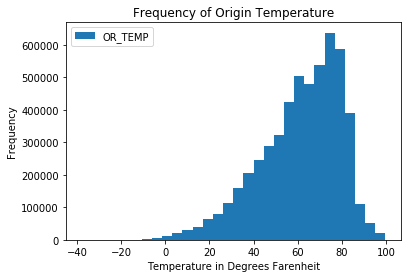

In [27]:
ax=fw_df[['OR_TEMP']].plot(kind='hist', bins = 30, title='Frequency of Origin Temperature')
ax.set_xlabel('Temperature in Degrees Farenheit')

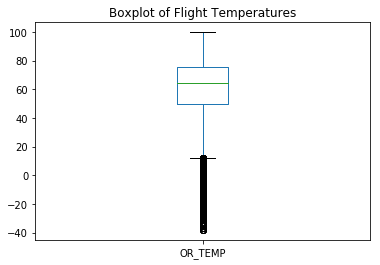

In [28]:
fw_df[['OR_TEMP']].plot(kind='box', title='Boxplot of Flight Temperatures')

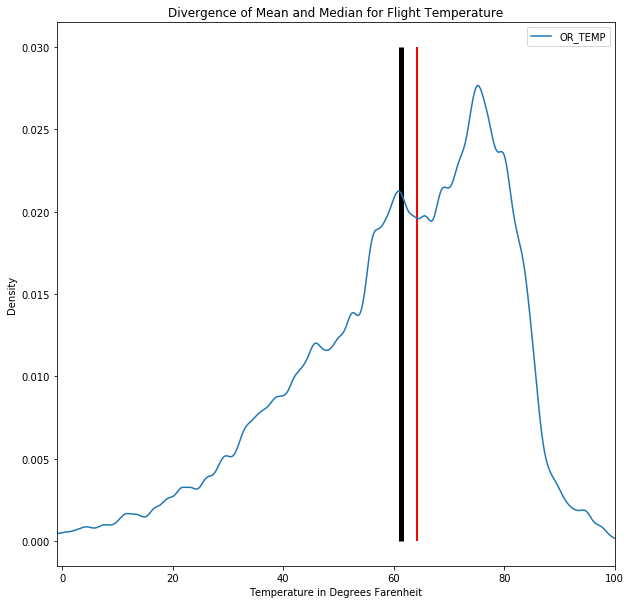

In [29]:
ax=fw_df[['OR_TEMP']].plot(kind="density",
              figsize=(10,10),
              xlim=(-1,100), title='Divergence of Mean and Median for Flight Temperature')
ax.set_xlabel('Temperature in Degrees Farenheit')


plt.vlines(fw_df[['OR_TEMP']].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=.03,
           linewidth=5.0)

plt.vlines(fw_df[['OR_TEMP']].median(),   # Plot red line at median
           ymin=0, 
           ymax=.03, 
           linewidth=2.0,
           color="red")

The temperature data looks a lot more normal than the other data. It is still skewed but not to the extreme amount that precipitation and delay are. The boxplot shows that there is still a lot of outliers but that non-outliers account for more data.

We can also do some pairplots to see how our weather data lines up with flight delays.

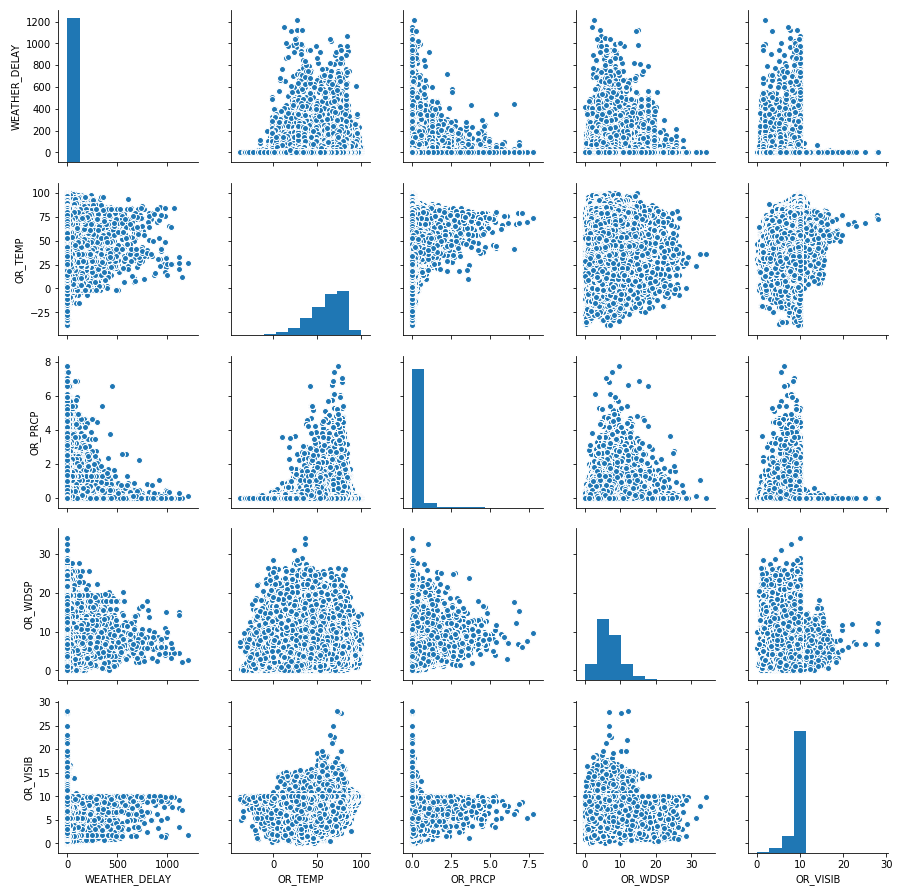

In [30]:
sns.pairplot(fw_df[['WEATHER_DELAY', 'OR_TEMP', 'OR_PRCP', 'OR_WDSP', 'OR_VISIB']].dropna())

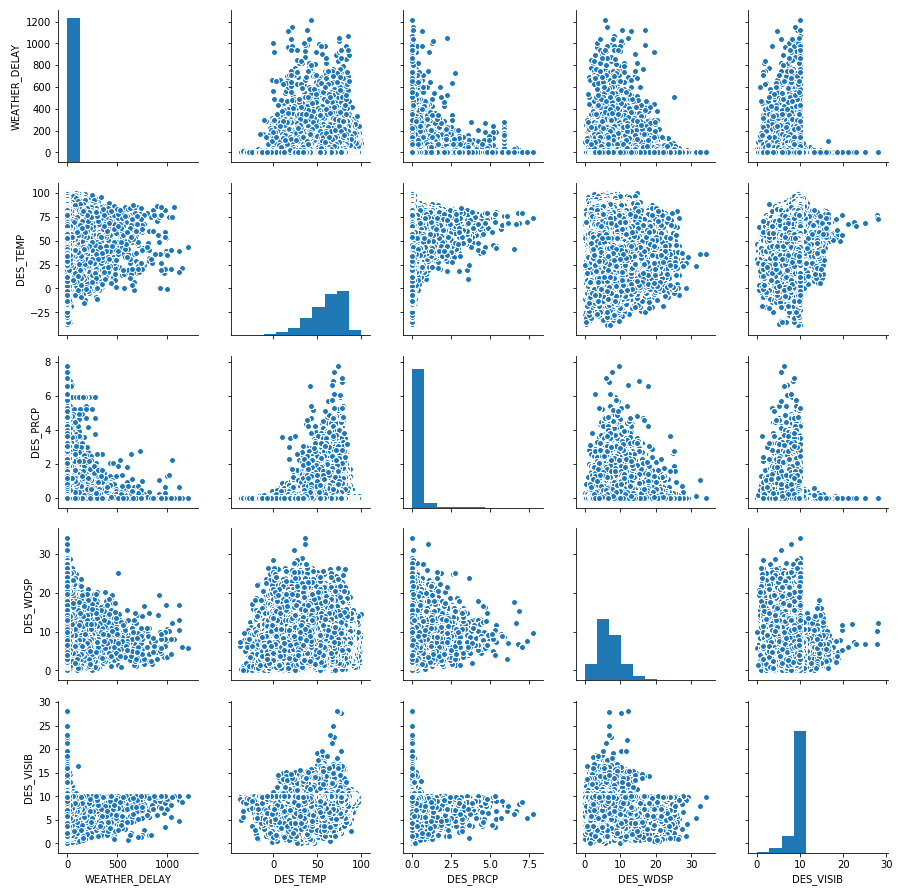

In [31]:
sns.pairplot(fw_df[['WEATHER_DELAY', 'DES_TEMP', 'DES_PRCP', 'DES_WDSP', 'DES_VISIB']].dropna())

Looking at the top row we for the Weather and precipitation pairings (3rd and 5th plots for origin and destination respectively) we see a trend that is the opposite of what we would expect, it seems like flight delay and precipitation seem inversely related. 

After performing our ttest (below) though this is most likely due to how extremely skewed these two sets of data are. It is extremely rare for either value to get far from zero so there are almost no flights where both delay and precipitation are very high.

#### Part 2 Method of Moments and Gamma Distribution

Since our flight delay and precipitation data is heavily skewed right, positive, and continuous, the Gamma distribution should be a good fit for our data.

First let's calculate the Methods of Moments:

In [32]:
f_mean = fw_df[['WEATHER_DELAY', 'OR_PRCP']].mean()
f_var = fw_df[['WEATHER_DELAY', 'OR_PRCP']].var()

alpha_mom = f_mean ** 2 / f_var
beta_mom = f_var / f_mean

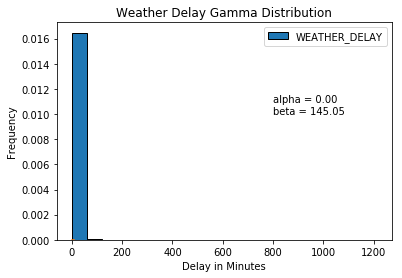

In [33]:
from scipy.stats.distributions import gamma

ax=fw_df[['WEATHER_DELAY']].plot(kind='hist', normed=True, bins=20, ec='black', title='Weather Delay Gamma Distribution')
ax.set_xlabel('Delay in Minutes')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[0], beta_mom[0])
plt.annotate(label, xy=(800, 0.01))
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

The gamma distribution line is almost barely visible this is hopefully due to how skewed this data is.

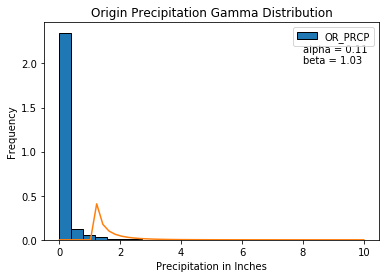

In [34]:
ax=fw_df[['OR_PRCP']].plot(kind='hist', normed=True, bins=20, ec='black', title='Origin Precipitation Gamma Distribution')
ax.set_xlabel('Precipitation in Inches')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[1], beta_mom[1])
plt.annotate(label, xy=(8, 2))
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[1], beta_mom[1]))

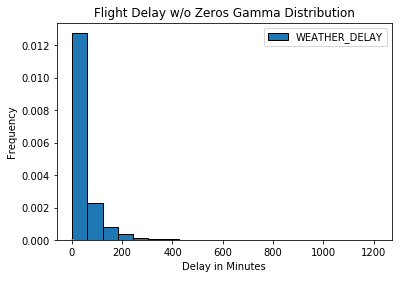

In [35]:
d_mean = fw_df.loc[fw_df['WEATHER_DELAY'] != 0][['WEATHER_DELAY']].mean()
d_var = fw_df.loc[fw_df['WEATHER_DELAY'] != 0][['WEATHER_DELAY']].var()
d_alpha_mom = d_mean ** 2 / d_var
d_beta_mom = d_var / d_mean
ax=fw_df.loc[fw_df['WEATHER_DELAY'] != 0][['WEATHER_DELAY']].plot(kind='hist', normed=True, bins=20, ec='black', title='Flight Delay w/o Zeros Gamma Distribution')
ax.set_xlabel('Delay in Minutes')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(d_alpha_mom[0], d_beta_mom[0])
plt.annotate(label, xy=(10, 0.2))
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), d_alpha_mom[0], d_beta_mom[0]))

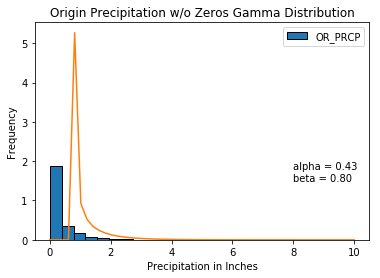

In [36]:
p_mean = fw_df.loc[fw_df['OR_PRCP'] != 0][['OR_PRCP']].mean()
p_var = fw_df.loc[fw_df['OR_PRCP'] != 0][['OR_PRCP']].var()
p_alpha_mom = p_mean ** 2 / p_var
p_beta_mom = p_var / p_mean
ax=fw_df.loc[fw_df['OR_PRCP'] != 0][['OR_PRCP']].plot(kind='hist', normed=True, bins=20, ec='black', title='Origin Precipitation w/o Zeros Gamma Distribution')
ax.set_xlabel('Precipitation in Inches')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(p_alpha_mom[0], p_beta_mom[0])
plt.annotate(label, xy=(8, 1.5))
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), p_alpha_mom[0], p_beta_mom[0]))

### Hypothesis Tests
Our null hypothesis would be that the mean weather conditions for flights with delays is the same as all flights. We can do this test for all of our weather variable, treating flights with a weather delay greater than 2 minutes as delayed:

#### Origin Precipitation

In [38]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_PRCP'], 
                 popmean=fw_df[['OR_PRCP']].mean(), nan_policy='omit')

Ttest_1sampResult(statistic=OR_PRCP    60.796898
dtype: float64, pvalue=array([ 0.]))

#### Origin Temp

In [40]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_TEMP'],
                 popmean=fw_df[['OR_TEMP']].mean())

Ttest_1sampResult(statistic=OR_TEMP   -50.545743
dtype: float64, pvalue=array([ 0.]))

#### Origin Max Temp

In [41]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_MAX'],
                 popmean=fw_df[['OR_MAX']].mean())

Ttest_1sampResult(statistic=OR_MAX   -46.152873
dtype: float64, pvalue=array([ 0.]))

#### Origin Min Temp

In [42]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_MIN'],
                 popmean=fw_df[['OR_MIN']].mean())

Ttest_1sampResult(statistic=OR_MIN   -38.318379
dtype: float64, pvalue=array([ 0.]))

#### Origin Windspeed

In [43]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_WDSP'],
                 popmean=fw_df[['OR_WDSP']].mean())

Ttest_1sampResult(statistic=OR_WDSP    59.551653
dtype: float64, pvalue=array([ 0.]))

#### Origin Visibility

In [45]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_VISIB'],
                 popmean=fw_df[['OR_VISIB']].mean())

Ttest_1sampResult(statistic=OR_VISIB   -118.895988
dtype: float64, pvalue=array([ 0.]))

#### Origin Fog

In [47]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_FOGV'],
                 popmean=fw_df[['OR_FOGV']].mean())

Ttest_1sampResult(statistic=OR_FOGV    90.396386
dtype: float64, pvalue=array([ 0.]))

#### Origin Rain or Drizzle

In [48]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_RAIN_DRIZZLEV'],
                 popmean=fw_df[['OR_RAIN_DRIZZLEV']].mean())

Ttest_1sampResult(statistic=OR_RAIN_DRIZZLEV    146.807582
dtype: float64, pvalue=array([ 0.]))

#### Origin Snow/Ice/Pellets

In [49]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_SNOW_ICE_PELLETSV'],
                 popmean=fw_df[['OR_SNOW_ICE_PELLETSV']].mean())

Ttest_1sampResult(statistic=OR_SNOW_ICE_PELLETSV    108.609514
dtype: float64, pvalue=array([ 0.]))

#### Origin Hail

In [50]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_HAILV'],
                 popmean=fw_df[['OR_HAILV']].mean())

Ttest_1sampResult(statistic=OR_HAILV    21.54153
dtype: float64, pvalue=array([  1.55794343e-102]))

#### Origin Thunder

In [51]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_THUNDERV'],
                 popmean=fw_df[['OR_THUNDERV']].mean())

Ttest_1sampResult(statistic=OR_THUNDERV    150.016047
dtype: float64, pvalue=array([ 0.]))

#### Origin Tornado/Funnel Cloud

In [53]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'OR_TORNADO_FUNNEL_CLOUDV'],
                 popmean=fw_df[['OR_TORNADO_FUNNEL_CLOUDV']].mean())

Ttest_1sampResult(statistic=OR_TORNADO_FUNNEL_CLOUDV    4.745598
dtype: float64, pvalue=array([  2.08369002e-06]))

#### Destination Precipitation

In [54]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_PRCP'], 
                 popmean=fw_df[['DES_PRCP']].mean(), nan_policy='omit')

Ttest_1sampResult(statistic=DES_PRCP    28.320863
dtype: float64, pvalue=array([  2.74364590e-175]))

#### Destination Temp

In [55]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_TEMP'],
                 popmean=fw_df[['DES_TEMP']].mean())

Ttest_1sampResult(statistic=DES_TEMP   -29.691884
dtype: float64, pvalue=array([  2.43162204e-192]))

#### Destination Max Temp

In [56]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_MAX'],
                 popmean=fw_df[['DES_MAX']].mean())

Ttest_1sampResult(statistic=DES_MAX   -24.75255
dtype: float64, pvalue=array([  1.38282781e-134]))

#### Destination Min Temp

In [57]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_MIN'],
                 popmean=fw_df[['DES_MIN']].mean())

Ttest_1sampResult(statistic=DES_MIN   -21.409528
dtype: float64, pvalue=array([  2.61179931e-101]))

#### Destination Windspeed

In [58]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_WDSP'],
                 popmean=fw_df[['DES_WDSP']].mean())

Ttest_1sampResult(statistic=DES_WDSP    34.674616
dtype: float64, pvalue=array([  7.32178353e-261]))

#### Destination Visibility

In [60]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_VISIB'],
                 popmean=fw_df[['DES_VISIB']].mean())

Ttest_1sampResult(statistic=DES_VISIB   -60.53221
dtype: float64, pvalue=array([ 0.]))

#### Destination Fog

In [61]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_FOGV'],
                 popmean=fw_df[['DES_FOGV']].mean())

Ttest_1sampResult(statistic=DES_FOGV    41.376716
dtype: float64, pvalue=array([ 0.]))

#### Destination Rain or Drizzle

In [62]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_RAIN_DRIZZLEV'],
                 popmean=fw_df[['DES_RAIN_DRIZZLEV']].mean())

Ttest_1sampResult(statistic=DES_RAIN_DRIZZLEV    54.490727
dtype: float64, pvalue=array([ 0.]))

#### Destination Snow/Ice/Pellets

In [63]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_SNOW_ICE_PELLETSV'],
                 popmean=fw_df[['DES_SNOW_ICE_PELLETSV']].mean())

Ttest_1sampResult(statistic=DES_SNOW_ICE_PELLETSV    47.553707
dtype: float64, pvalue=array([ 0.]))

#### Destination Hail

In [64]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_HAILV'],
                 popmean=fw_df[['DES_HAILV']].mean())

Ttest_1sampResult(statistic=DES_HAILV    5.0094
dtype: float64, pvalue=array([  5.47547813e-07]))

#### Destination Thunder

In [67]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_THUNDERV'],
                 popmean=fw_df[['DES_THUNDERV']].mean())

Ttest_1sampResult(statistic=DES_THUNDERV    50.467426
dtype: float64, pvalue=array([ 0.]))

#### Destination Tornado/Funnel Cloud

In [68]:
stats.ttest_1samp(a=fw_df.loc[fw_df['WEATHER_DELAY'] > 2, 'DES_TORNADO_FUNNEL_CLOUDV'],
                 popmean=fw_df[['DES_TORNADO_FUNNEL_CLOUDV']].mean())

Ttest_1sampResult(statistic=DES_TORNADO_FUNNEL_CLOUDV    4.83444
dtype: float64, pvalue=array([  1.33850764e-06]))

#### Conclusion
Based on these t-tests it appears that the null hypothesis is almost certainly false for all our variables. Although some have weaker pvalues such as Tornado/Funnel Cloud. Also it looks like the data is more different for origin weather than destination as most destination pvalues are weaker than the origin pvalue.

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fw_df[['OR_TEMP', 'OR_VISIB',
               'OR_WDSP', 'OR_MXSPD', 'OR_SNDP', 'OR_PRCP','OR_MAX', 'OR_MIN', 'OR_FOGV',
               'OR_RAIN_DRIZZLEV', 'OR_SNOW_ICE_PELLETSV', 'OR_HAILV', 'OR_THUNDERV', 'OR_TORNADO_FUNNEL_CLOUDV',
               'DES_TEMP', 'DES_VISIB', 'DES_WDSP', 'DES_MXSPD', 'DES_SNDP', 'DES_PRCP','DES_MAX',
               'DES_MIN', 'DES_FOGV', 'DES_RAIN_DRIZZLEV', 'DES_SNOW_ICE_PELLETSV', 'DES_HAILV', 'DES_THUNDERV',
               'DES_TORNADO_FUNNEL_CLOUDV']], fw_df[['WEATHER_DELAY']])


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

[ 1.58576107]
[[ -8.16028151e-04  -1.59958745e-01  -3.17914567e-02   5.14183989e-02
    1.03187387e-01  -3.82628603e-02  -7.24171049e-04   4.57302051e-03
    5.32012144e-01  -6.89911975e-02   1.48814317e+00   1.68906580e+00
    1.42156860e+00   4.94953975e-01  -3.56834499e-03  -7.27459211e-02
   -6.32184145e-04   1.47975149e-02  -2.44961013e-03   7.08301410e-03
    1.09213124e-04   3.17374647e-03   2.92515612e-01  -3.70978157e-02
    1.20538744e-01   2.26798139e-01   4.07902342e-01   9.39071914e-01]]


In [13]:
lm.score(X_test, y_test)

0.0090941682341526553